# Objective of this study


1. Show how the dataset is structured
2. Explore a bit about customer behaviour based on the data and do basic customer segmentation
3. Implement Models
    3.1 Logistic Regression
    3.2 Kmeans

In [ ]:
import pandas as pd
import numpy as np

import datetime 
import time

%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

# Load the datasets

This dataset was taken from the Retail Rocket Recommender System dataset: https://www.kaggle.com/retailrocket/ecommerce-dataset/home

And data was between June 2, 2015 and August 1, 2015

In [2]:
events_df = pd.read_csv('events.csv')

In [3]:
events_df.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


The timestamp portion is in Unix Epoch format e.g. 1433221332117 will be converted to Tuesday, 2 June 2015 5:02:12.117 AM GMT

Visitor Id is the unique user currently browsing the website

Event is what the user is currently doing in that current timestamp

Transaction ID will only have value if the user made a purchase as shown below

In [4]:
category_tree_df = pd.read_csv('category_tree.csv')

In [5]:
category_tree_df.head()

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


Category IDs explain the relationship of different products with each other e.g. Category ID 1016 is a child of Parent ID 213.

In [7]:
#Combine items dataset
items1 = pd.read_csv('item_properties_part1.csv')
items2 = pd.read_csv('item_properties_part2.csv')

In [8]:
items_df = pd.concat([items1,items2])

In [9]:
items_df.head()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


Timestamp is still the same Unix / Epoch format

Item id will be the unique item identifier

Property is the Item's attributes such as category id and availability while the rest are hashed for confidentiality purposes

Value is the item's property value e.g. availability is 1 if there is stock and 0 otherwise

Note: Values that start with "n" indicate that the value preceeding it is a number e.g. n277.200 is equal to 277.2

# Let us explore the files

## Which customer has one transaction in events file

In [10]:
events_df[events_df.transactionid.notnull()]

,timestamp,visitorid,event,itemid,transactionid
130,1433222276276,599528,transaction,356475,4000.0
304,1433193500981,121688,transaction,15335,11117.0
418,1433193915008,552148,transaction,81345,5444.0
814,1433176736375,102019,transaction,150318,13556.0
843,1433174518180,189384,transaction,310791,7244.0
1214,1433184261340,350566,transaction,54058,8796.0
1215,1433184261371,350566,transaction,284871,8796.0
1234,1433182772710,404403,transaction,150100,5216.0
1350,1433164275232,505565,transaction,243566,11713.0
1512,1433180403455,945184,transaction,245400,2415.0


## Total Number of transactions done by customers

In [11]:
events_df[events_df.event == 'transaction'].event.value_counts()

transaction    22457
Name: event, dtype: int64

## Total Number of views and add to carts by customers

In [12]:
events_df[events_df.event == 'view'].event.value_counts()

view    2664312
Name: event, dtype: int64

In [13]:
events_df[events_df.event == 'addtocart'].event.value_counts()

addtocart    69332
Name: event, dtype: int64

## Below shows the number of items under category id 1016

In [14]:
items_df.loc[(items_df.property == 'categoryid') & (items_df.value == '1016')].sort_values('timestamp').head(10)

,timestamp,itemid,property,value
7236969,1431226800000,6777,categoryid,1016
8597591,1431226800000,161686,categoryid,1016
9496408,1431226800000,276491,categoryid,1016
6880131,1431226800000,443058,categoryid,1016
7202531,1431226800000,462004,categoryid,1016
10230975,1431226800000,85538,categoryid,1016
7440982,1431226800000,146577,categoryid,1016
829553,1431226800000,195160,categoryid,1016
1612890,1431226800000,97200,categoryid,1016
2137346,1431226800000,152865,categoryid,1016


# Customer behaviour exploration

I think it's prudent to start separating customers into two categories, those who purchased something and those who didn't

In [3]:
#Let's get all the customers who bought something
customer_purchased = events_df[events_df.transactionid.notnull()].visitorid.unique()
customer_purchased.size

11719

## Assumptions

Since we have no information whether there were any repeat users who bought something from the site, I'll just have to assume for now that the 11,719 visitors are unique and made at least a single purchase

In [4]:
#Let's get all unique visitor ids as well
all_customers = events_df.visitorid.unique()
all_customers.size

1407580

Out of 1,407,580 unique visitor ids, let's take out the ones that bought something

In [5]:
customer_browsed = [x for x in all_customers if x not in customer_purchased]
len(customer_browsed)

1395861

In [6]:
#A sample list of the customers who bought something
customer_purchased[:10]

array([ 599528,  121688,  552148,  102019,  189384,  350566,  404403,
        505565,  945184, 1406787], dtype=int64)

## Below is a snapshot of visitor id 102019 and their buying journey from viewing to transaction (purchase)

In [7]:
events_df[events_df.visitorid == 102019].sort_values('timestamp')

,timestamp,visitorid,event,itemid,transactionid
19690,1433175714335,102019,view,49521,NaN
19501,1433175801314,102019,addtocart,49521,NaN
14842,1433175812596,102019,view,150318,NaN
19573,1433175871497,102019,view,49521,NaN
8701,1433175894837,102019,view,49521,NaN
19708,1433175945872,102019,view,150318,NaN
8740,1433176042269,102019,view,49521,NaN
814,1433176736375,102019,transaction,150318,13556.0
19724,1433176736422,102019,transaction,49521,13556.0


If we want to convert the UNIX / Epoch time format to readable format then just do the code below

In [24]:
#convert the UNIX / Epoch time format to readable format
tz = int('1433221332')
new_time = datetime.datetime.fromtimestamp(tz)
new_time.strftime('%Y-%m-%d %H:%M:%S')

'2015-06-02 10:32:12'

In [25]:
tz = int('1438400163')
new_time = datetime.datetime.fromtimestamp(tz)
new_time.strftime('%Y-%m-%d %H:%M:%S')

'2015-08-01 09:06:03'

## What insights can we offer the visitor to guide them in their buying journey?

perhaps we can offer them a list of what previous visitors bought together with the item they are currently viewing

In [ ]:
# Create another list that contains all their purchases 
for customer in customer_purchased:

    #Generate a Pandas series type object containing all the visitor's purchases and put them in the list
    purchased_items.append(list(events_df.loc[(events_df.visitorid == customer) & (events_df.transactionid.notnull())].itemid.values))   

So now all items purchased together are presented as a list of lists, shown below are the first 5 samples

In [ ]:
purchased_items[:5]

[[356475],
 [15335,
  380775,
  237753,
  317178,
  12836,
  400969,
  105792,
  25353,
  200793,
  80582,
  302422],
 [81345],
 [150318, 49521],
 [310791, 299044]]

## Can we perhaps cluster the visitors and see if classes appear?

Create a new dataframe and engineer a few features for it

How many unique visitors did we have for the site from June 2, 2015 to August 1, 2015?

Shown below are the total number of visitors for that time duration

In [4]:
#Put all the visitor id in an array and sort it ascendingly
all_visitors = events_df.visitorid.sort_values().unique()
all_visitors.size

1407580

In [5]:
buying_visitors = events_df[events_df.event == 'transaction'].visitorid.sort_values().unique()
buying_visitors.size

11719

Out of 1,407,580 visitors, ony 11,719 bought something so around 1,395,861 visitors just viewed items

In [6]:
viewing_visitors_list = list(set(all_visitors) - set(buying_visitors))


In [7]:
len(viewing_visitors_list)

1395861

Now lets create a function that creates a dataframe with new features: visitorid, number of items viewed, total viewcount, bought something or not

In [8]:
def create_dataframe(visitor_list):
    
    array_for_df = []
    for index in visitor_list:

        #Create that visitor's dataframe once
        v_df = events_df[events_df.visitorid == index]

        temp = []
        #Add the visitor id
        temp.append(index)

        #Add the total number of unique products viewed
        temp.append(v_df[v_df.event == 'view'].itemid.unique().size)

        #Add the total number of views regardless of product type
        temp.append(v_df[v_df.event == 'view'].event.count())

        #Add the total number of purchases
        number_of_items_bought = v_df[v_df.event == 'transaction'].event.count()
        temp.append(number_of_items_bought)

        #Then put either a zero or one if they made a purchase
        if(number_of_items_bought == 0):
            temp.append(0)
        else:
            temp.append(1)

        array_for_df.append(temp)
    
    return pd.DataFrame(array_for_df, columns=['visitorid', 'num_items_viewed', 'view_count', 'bought_count', 'purchased'])

In [9]:
buying_visitors_df = create_dataframe(buying_visitors)

In [10]:
buying_visitors_df.shape

(11719, 5)

Only get around 27,821 samples from the viewing visitors list so that there is a 70-30 split for training and test data

In [11]:
#Let's shuffle the viewing visitors list for randomness
import random
random.shuffle(viewing_visitors_list)

In [13]:
viewing_visitors_df = create_dataframe(viewing_visitors_list[0:27820])

In [14]:
viewing_visitors_df.shape

(27820, 5)

combine the two dataframes

In [15]:
main_df = pd.concat([buying_visitors_df, viewing_visitors_df], ignore_index=True)

In [16]:
main_df.head(10)

,visitorid,num_items_viewed,view_count,bought_count,purchased
0,172,22,33,2,1
1,186,1,2,1,1
2,264,2,3,2,1
3,419,3,4,1,1
4,539,1,4,1,1
5,627,12,17,1,1
6,795,7,14,1,1
7,914,1,1,1,1
8,964,1,6,1,1
9,1032,3,5,1,1


In [32]:
main_df.tail(10)

,visitorid,num_items_viewed,view_count,bought_count,purchased
39529,1051202,1,1,0,0
39530,1301723,1,1,0,0
39531,10496,1,1,0,0
39532,483622,1,1,0,0
39533,950358,3,10,0,0
39534,701418,1,1,0,0
39535,1026726,1,1,0,0
39536,1172681,1,1,0,0
39537,985152,1,1,0,0
39538,190623,1,1,0,0


In [ ]:
#View count is more 

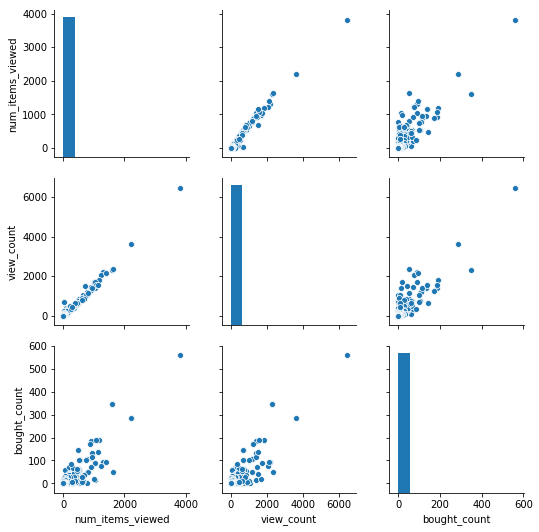

In [35]:
#Plot the data
sns.pairplot(main_df, x_vars = ['num_items_viewed', 'view_count', 'bought_count'],
             y_vars = ['num_items_viewed', 'view_count', 'bought_count'])

The plot above clearly indicates that the higher the view count, the higher the chances of that visitor buying something.

# The Model - Logistic Regression (Supervised Algorithm)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

We separate the features (drop visitorid since it's categorical data and bought count) and the target (which is whether the visitor bought something or not)

In [37]:
X = main_df.drop(['purchased', 'visitorid', 'bought_count'], axis = 'columns')
y = main_df.purchased

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.7)

C:\Users\Dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [39]:
logreg = LogisticRegression()

In [40]:
logreg.fit(X_train, y_train)

C:\Users\Dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
# Let's now use the model to predict the test features
y_pred_class = logreg.predict(X_test)

In [42]:
y_pred_class

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

## Accuracy

In [33]:
print('accuracy = {:7.4f}'.format(metrics.accuracy_score(y_test, y_pred_class)))

accuracy =  0.7897


## Confusion Matrix

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
confusion_matrix(y_test,y_pred_class)

array([[8055,  263],
       [2232, 1312]], dtype=int64)

In [36]:
print (classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87      8318
           1       0.83      0.37      0.51      3544

   micro avg       0.79      0.79      0.79     11862
   macro avg       0.81      0.67      0.69     11862
weighted avg       0.80      0.79      0.76     11862



## Performance Metric - Mean Absolute Error(MAE), Root Mean Squared Error(RMSE), ROC

In [38]:
#MAE
print('MAE = {:7.4f}'.format(metrics.mean_absolute_error(y_test, y_pred_class)))

MAE =  0.2103


In [41]:
#RMSE
print('RMSE = {:7.4f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_class))))

RMSE =  0.4586


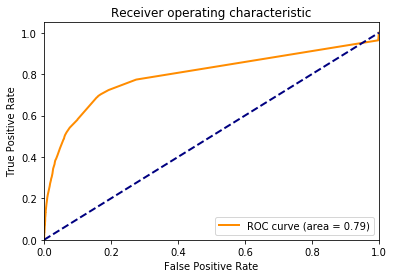

In [42]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.show()


The graph above shows the accuracy of our binary classifier (Logistic Regression). Just means that the closer the orange curve leans to the top left hand part of the graph, the better the accuracy.

# The Model - KMeans (Unsupervised Algorithm)

In [17]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

In [18]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(main_df)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

C:\Users\Dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4
count,3.953900e+04,3.953900e+04,3.953900e+04,3.953900e+04,3.953900e+04
mean,-3.574200e-16,-1.467336e-14,3.212650e-15,-2.045208e-14,-2.421111e-13
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-1.739150e+00,-1.002744e-01,-9.842051e-02,-1.159833e-01,-6.490329e-01
25%,-8.636940e-01,-7.350492e-02,-8.142899e-02,-1.159833e-01,-6.490329e-01
50%,5.221661e-03,-7.350492e-02,-8.142899e-02,-1.159833e-01,-6.490329e-01
75%,8.654361e-01,-4.673542e-02,-4.744595e-02,8.822310e-02,1.540754e+00
max,1.742675e+00,1.018647e+02,1.099896e+02,1.140354e+02,1.540754e+00


In [19]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
# inertia on the fitted data
kmeans.inertia_

129693.32485082377

Text(0, 0.5, 'Inertia')

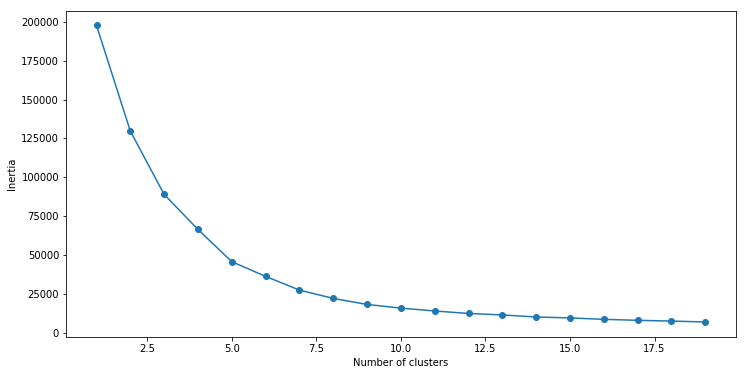

In [21]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [22]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [23]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    13967
2    13853
4    11685
3       33
1        1
Name: cluster, dtype: int64